# 目标检测模型评估分析

本notebook将详细分析一个目标检测模型的各项评估指标

### 专业术语解释

* **置信度(Confidence)**：模型对预测结果的确信程度，范围0-1
* **mAP(mean Average Precision)**：各类别AP值的平均值，是目标检测中最常用的评估指标
* **IoU(Intersection over Union)**：预测框与真实框的重叠度，用于评估定位精度
* **数据增强(Data Augmentation)**：通过旋转、缩放等操作增加训练样本的多样性
* **批次(Batch)**：一次训练所使用的样本数量，这里每个批次包含多张图像

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from matplotlib import font_manager

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False     




## 1. 混淆矩阵 (Confusion Matrix)

混淆矩阵是评估分类模型性能的重要工具。它展示了模型在每个类别上的预测情况。

* 对角线上的数值表示正确分类的比例
* 非对角线的数值表示错误分类的比例
* 数值范围在0-1之间，越接近1表示分类效果越好

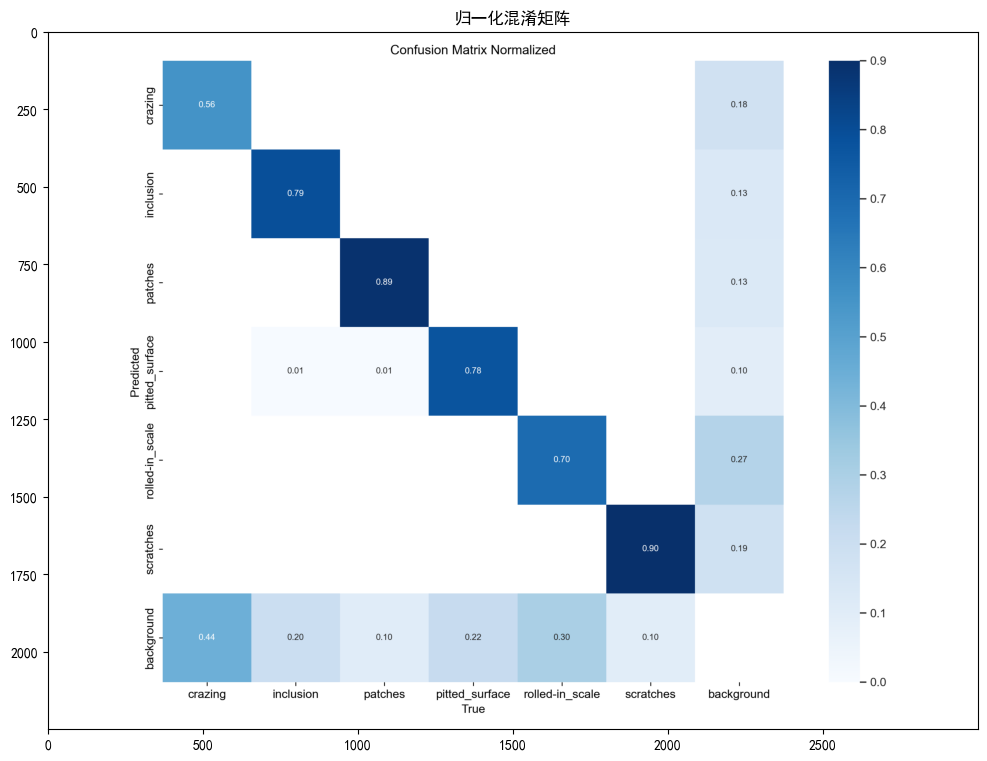

In [2]:
confusion_matrix = mpimg.imread('D:\\Program\\defect_detection\\runs\\detect\\train2\\confusion_matrix_normalized.png')
plt.figure(figsize=(12, 10))
plt.imshow(confusion_matrix)
plt.title('归一化混淆矩阵')
plt.show()

从混淆矩阵中我们可以看出：
* patches类别的识别效果最好，对角线值达到0.89
* scratches类别次之，对角线值为0.90
* crazing类别的识别效果相对较差，对角线值为0.56

## 2. 精确率-召回率曲线 (Precision-Recall Curve)

精确率(Precision)和召回率(Recall)是评估模型性能的两个重要指标：

* 精确率：在所有被预测为正类的样本中，真正为正类的比例
* 召回率：在所有真实为正类的样本中，被正确预测出来的比例

PR曲线展示了不同阈值下精确率和召回率的关系：
* 曲线越接近右上角，说明模型性能越好
* AP值(Average Precision)是PR曲线下的面积，越大越好

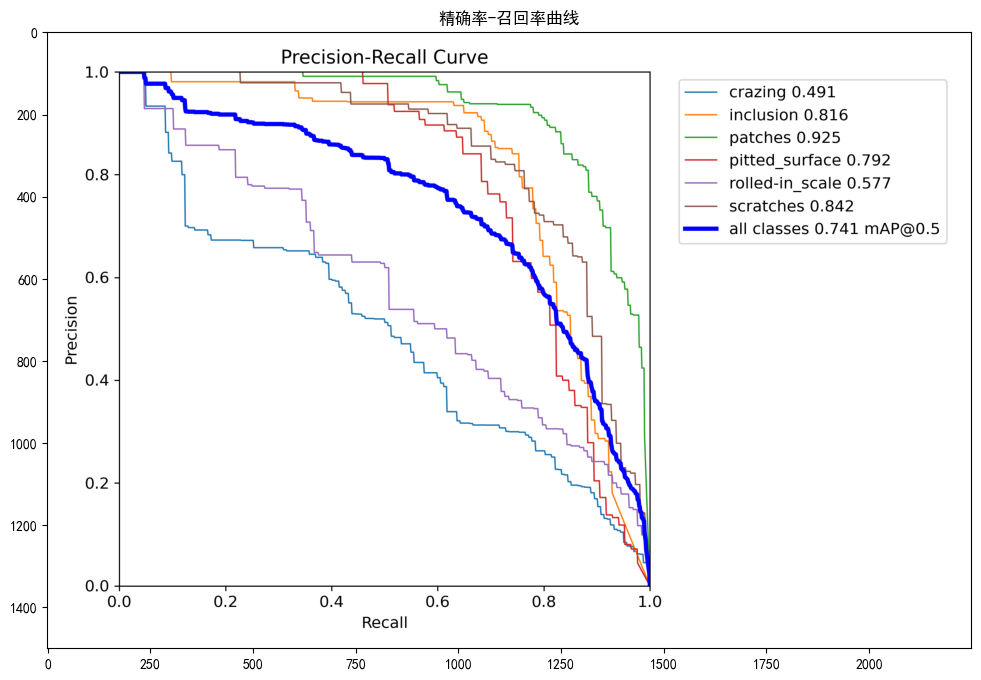

In [3]:
pr_curve = mpimg.imread('D:\\Program\\defect_detection\\runs\\detect\\train2\\PR_curve.png')
plt.figure(figsize=(12, 8))
plt.imshow(pr_curve)
plt.title('精确率-召回率曲线')
plt.show()

从PR曲线可以看出：
* patches类别的AP值最高，达到0.925
* scratches和inclusion类别次之，AP值分别为0.842和0.816
* crazing类别的AP值最低，为0.491

## 3. F1分数曲线 (F1-Score Curve)

F1分数是精确率和召回率的调和平均值：
* F1 = 2 * (精确率 * 召回率) / (精确率 + 召回率)
* F1分数的范围在0-1之间，越接近1表示模型性能越好
* F1分数同时考虑了精确率和召回率，是一个比较全面的评估指标

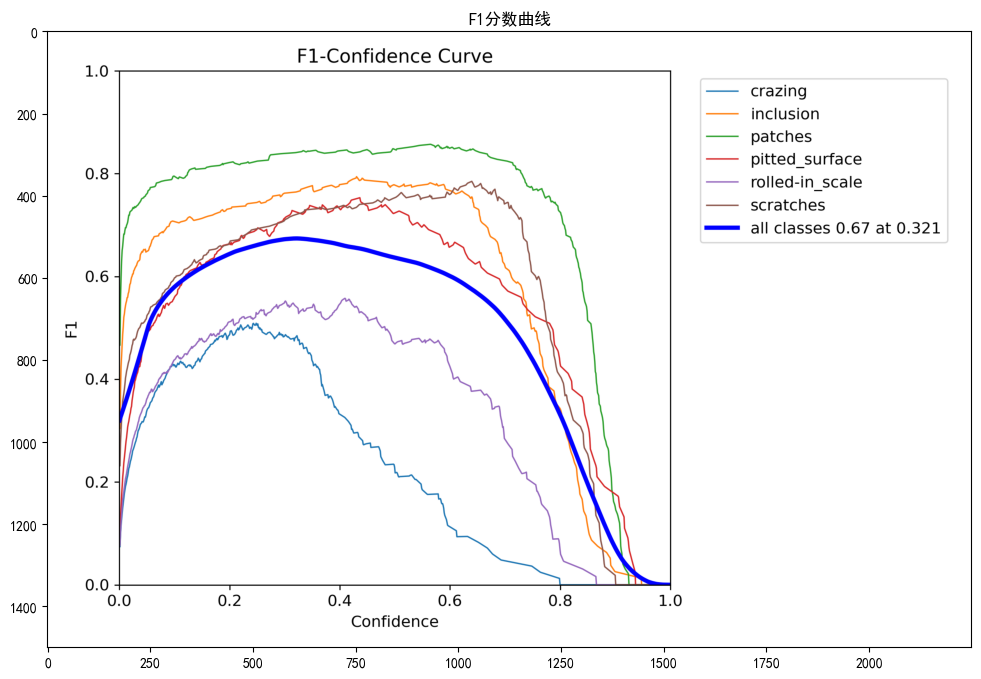

In [4]:
f1_curve = mpimg.imread('D:\\Program\\defect_detection\\runs\\detect\\train2\\F1_curve.png')
plt.figure(figsize=(12, 8))
plt.imshow(f1_curve)
plt.title('F1分数曲线')
plt.show()

## 4. 训练过程可视化

训练批次图像展示了模型在训练过程中的检测效果：
* 不同颜色的框表示不同类别的缺陷
* 框上的数字表示检测的置信度
* 通过比较不同训练阶段的图像，可以直观地看出模型的进步

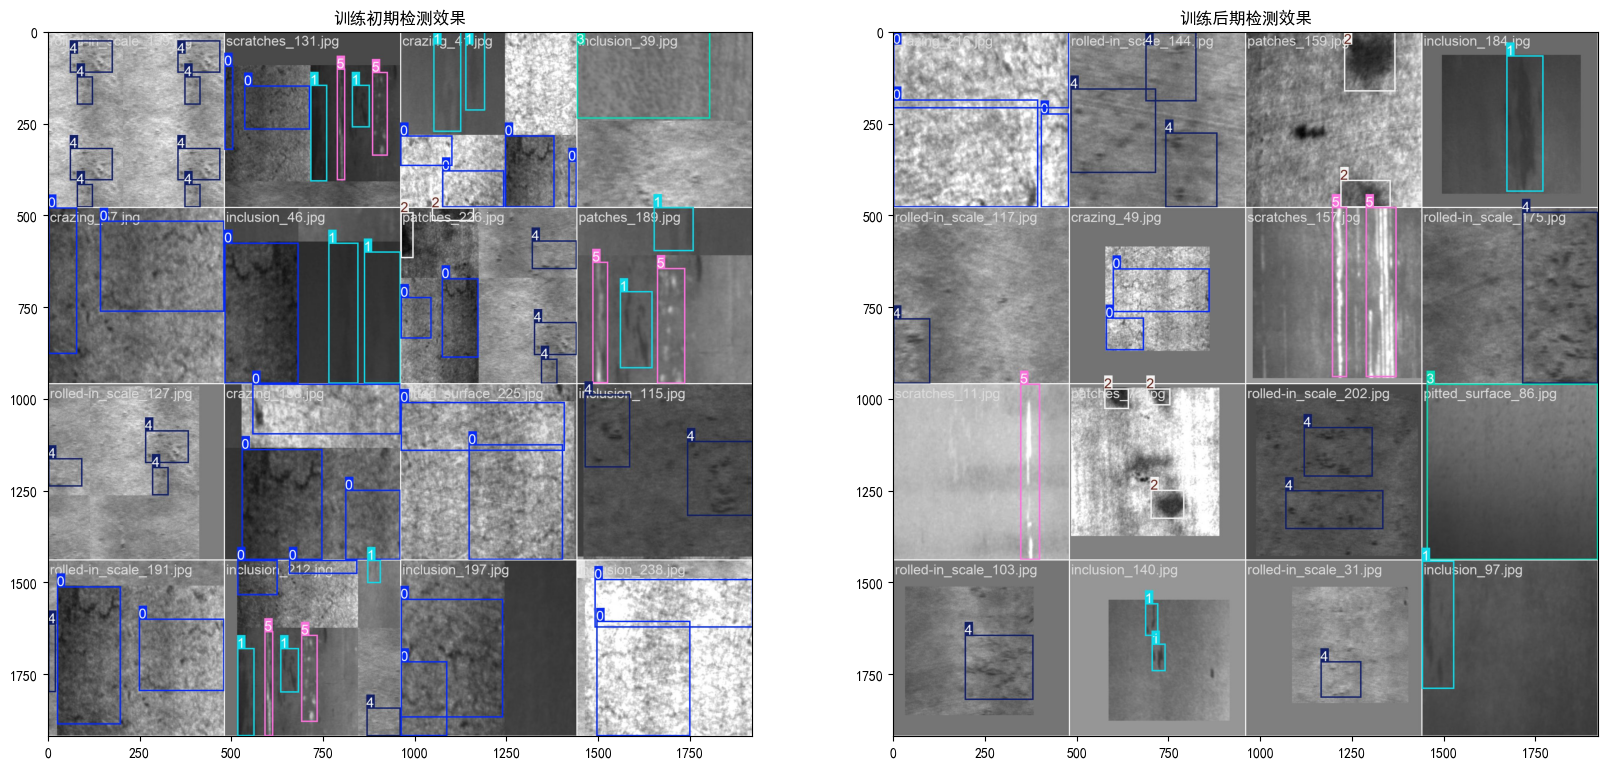

In [5]:
batch0 = mpimg.imread('D:\\Program\\defect_detection\\runs\\detect\\train2\\train_batch0.jpg')
batch8100 = mpimg.imread('D:\\Program\\defect_detection\\runs\\detect\\train2\\train_batch8100.jpg')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(batch0)
ax1.set_title('训练初期检测效果')
ax2.imshow(batch8100)
ax2.set_title('训练后期检测效果')
plt.show()

## 5. 模型验证分析






验证批次图像展示了模型在验证过程中的检测效果：
* 不同颜色的框表示不同类别的缺陷
* 框上的数字表示检测的置信度
* 通过比较不同验证阶段的图像，可以直观地看出模型的进步

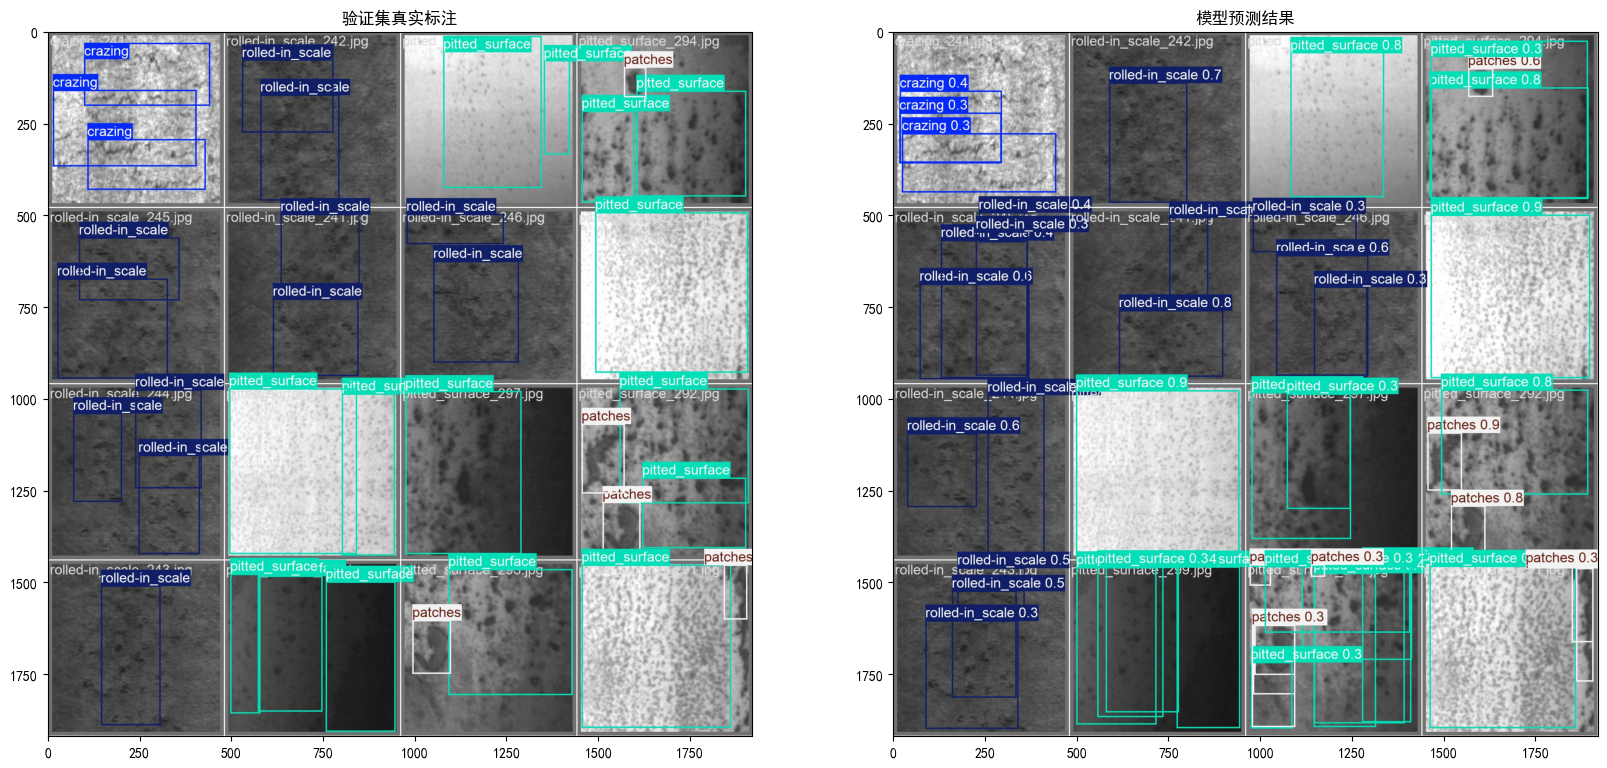

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

val_label = mpimg.imread('D:\\Program\\defect_detection\\runs\\detect\\train2\\val_batch0_labels.jpg')
val_pred = mpimg.imread('D:\\Program\\defect_detection\\runs\\detect\\train2\\val_batch0_pred.jpg')

ax1.imshow(val_label)
ax1.set_title('验证集真实标注')

ax2.imshow(val_pred)
ax2.set_title('模型预测结果')

plt.show()


#### 验证集图像特点
1. **缺陷类型分布**：
   - `crazing`（开裂）：呈现为灰白色的裂纹纹理
   - `rolled-in_scale`（轧制鳞片）：表现为深色的不规则区域
   - `pitted_surface`（点蚀表面）：呈现为密集的小点状缺陷
   - `patches`（斑块）：表现为较大面积的不规则暗区

#### 检测效果分析

1. **置信度表现**：
   - `patches`类别：置信度最高，普遍在0.8-0.9之间
   - `pitted_surface`：次之，置信度在0.3-0.9之间
   - `rolled-in_scale`：置信度在0.3-0.8之间
   - `crazing`：置信度相对较低，在0.3-0.4之间

2. **定位准确性**：
   - 大尺寸缺陷（如patches）：边界框定位准确
   - 线性缺陷（如crazing）：能够准确捕捉缺陷的延伸方向
   - 密集缺陷（如pitted_surface）：能够合理划分检测区域

3. **多目标检测能力**：
   - 同类型多缺陷：能够分别识别和定位
   - 不同类型共存：可以准确区分不同类型的缺陷
   - 重叠区域处理：对部分重叠的缺陷也能合理检测

#### 存在的问题

1. **置信度不稳定**：
   - 同一类型缺陷的置信度波动较大
   - 特别是在`crazing`和`rolled-in_scale`类别上表现明显

2. **漏检情况**：
   - 部分小面积的缺陷可能被忽略
   - 边缘区域的缺陷检测效果相对较差

3. **误检分析**：
   - 某些纹理相似的区域可能产生误检
   - 不同类型缺陷的边界区分有时不够清晰

## 6 验证集预测效果对比

让我们对比验证集上的标注和预测结果：

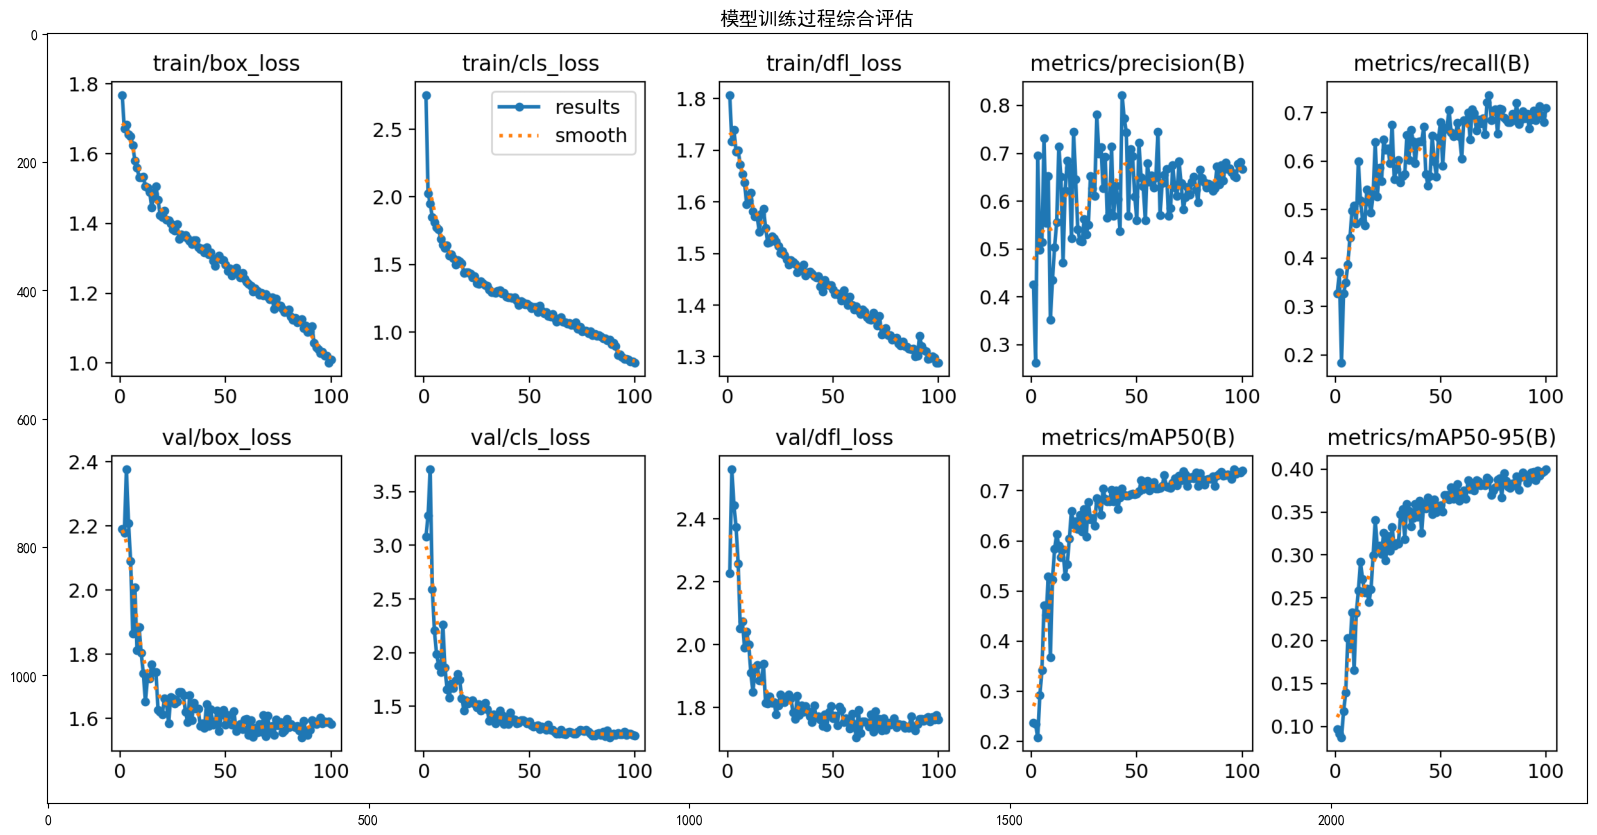

In [7]:
# 显示整体训练结果
plt.figure(figsize=(20, 10))
results = mpimg.imread('D:\\Program\\defect_detection\\runs\\detect\\train2\\results.png')
plt.imshow(results)
plt.title('模型训练过程综合评估', fontsize=14)
plt.show()

从训练结果图中可以看出10个关键指标的变化趋势：

#### 训练阶段损失函数：
1. `train/box_loss`: 边界框回归损失从1.8降至1.0
2. `train/cls_loss`: 分类损失从2.5降至0.8
3. `train/dfl_loss`: 分布式焦点损失从1.8降至1.3

#### 验证阶段损失函数：
4. `val/box_loss`: 验证集边界框损失最终稳定在1.6左右
5. `val/cls_loss`: 验证集分类损失稳定在1.3左右
6. `val/dfl_loss`: 验证集DFL损失稳定在1.8左右

#### 模型性能指标：
7. `metrics/precision(B)`: 精确率波动上升，最终稳定在0.65-0.70
8. `metrics/recall(B)`: 召回率持续提升，最终达到约0.70
9. `metrics/mAP50(B)`: mAP@0.5指标稳定在0.70以上
10. `metrics/mAP50-95(B)`: 更严格标准下的mAP值达到0.40

#### 关键发现：
- 所有损失函数都呈现明显的下降趋势
- 验证集损失的平稳趋势表明模型没有过拟合
- 性能指标在训练后期趋于稳定，说明模型已经收敛
- mAP50和mAP50-95的差异表明模型在严格IoU阈值下仍有提升空间

## 7. 结果分析
#### 1. 训练集和验证集上的三个主要损失指标对比

| 损失类型 | 训练集(Train) | 验证集(Val) | 关系分析 |
|---------|--------------|------------|---------|
| box_loss | 1.8 → 1.0 | 2.2 → 1.6 | 验证损失略高但趋势一致 |
| cls_loss | 2.5 → 0.8 | 3.5 → 1.3 | 验证损失收敛较慢 |
| dfl_loss | 1.8 → 1.3 | 2.4 → 1.8 | 保持稳定的差距 |

#### 2. 训练过程特点

1. **早期阶段（0-20轮）**：
   - 训练损失快速下降
   - 验证损失波动较大
   - 模型处于快速学习阶段

2. **中期阶段（20-60轮）**：
   - 训练损失持续缓慢下降
   - 验证损失开始趋于稳定
   - 模型进入细化学习阶段

3. **后期阶段（60-100轮）**：
   - 训练和验证损失都趋于平稳
   - 性能指标（mAP）持续小幅提升
   - 模型达到相对稳定状态

#### 3. 模型状态评估

1. **收敛性分析**：
   -  训练损失持续下降
   -  验证损失同步下降
   -  两者差距保持稳定
   -  没有出现显著震荡

2. **过拟合检测**：
   -  验证损失没有明显上升
   -  训练验证损失差距合理
   -  性能指标保持提升趋势

3. **学习效果**：
   - metrics/mAP50(B)持续提升至0.70以上
   - metrics/precision(B)和recall(B)同步改善
   - 各类缺陷检测能力均有提升


## 根据以上评估指标，我们可以得出以下结论：

1. 模型在patches类别上表现最好，各项指标都达到较高水平
2. scratches和inclusion类别的检测效果次之
3. crazing类别的检测效果相对较差，需要进一步改进

改进建议：
1. 增加crazing类别的训练样本
2. 针对crazing类别调整数据增强策略
3. 考虑使用更复杂的模型结构
